Hunter Bennett | Glass Lab | Kupffer Strains Project | 10 March 2021

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [1]:
dataDirectory = '/home/h1bennet/strains/data/PU1/control/'
inputDirectory = '/home/h1bennet/strains/data/input/'

workingDirectory = '/home/h1bennet/strains/results/00_Strains_Control_PU1/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

NameError: name 'os' is not defined

# Quality control

In [4]:
qc = ngs_qc(dataDirectory, 'atac')

/home/h1bennet/strains/data/PU1/control//
./control_qc/


<Figure size 432x288 with 0 Axes>

In [5]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
aj_M_Tim4PKup_ChIP_PU1_Flavopiridol_TDTJSS_AJ10ABC_TDT_l20170915,13759772.0,227.0,0.006219,1.230,-1.000,20298123.0,15345563.0,4047990.0,904570.0,0.756009,0.955436
balb_M_Tim4PKup_ChIP_PU1_Flavopiridol_TDTJSS_BALB10ABC_TDT_l20170915,12598946.0,188.0,0.005218,1.127,-1.000,17125597.0,12879254.0,3520280.0,726063.0,0.752047,0.957604
balbcj_M_KupfferTim4Pos_PU1_ChIP_notx_TDTJSS_BALB11AB_s20161208,12574480.0,121.0,0.008093,1.752,-1.000,27778221.0,20555081.0,6083126.0,1140014.0,0.739971,0.958960
c57bl6j_Male_Tim4PosKupffer_ChIP_PU1_notx_TDTJSS_Pool_l20180423,16222962.0,174.0,0.007659,1.287,0.443,23626927.0,19321457.0,3873592.0,431878.0,0.817773,0.981721
mouse_C57Bl6_M_KupfferTim4Pos_ChIP_PU1_NoTx_JSSTDT_PC231A_JSS_l20180201_concat,11259198.0,145.0,0.004585,1.110,0.438,15225287.0,11647290.0,3060066.0,517931.0,0.764996,0.965982


### Plot tag count distribution

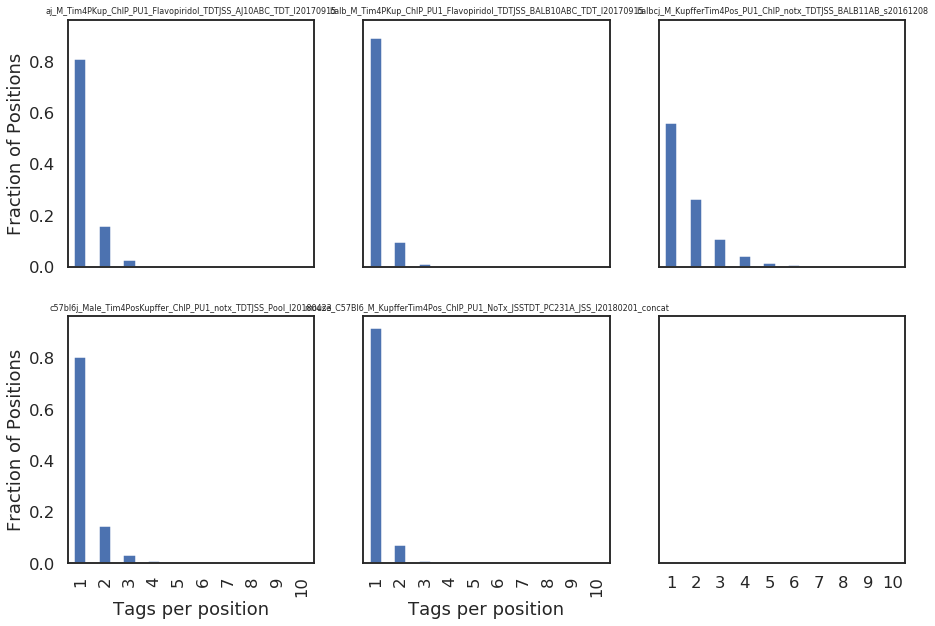

In [6]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|


    makeMultiWigHub.pl hrb_strains_qc_pu1_control mm10 -force -color \
    228,26,28 \
    55,126,184 55,126,184 \
    77,175,74 77,175,74 \
    -d /gpfs/data01/glasslab/home/h1bennet/strains/data/PU1/control/*

 Based on the browser tracks and the qc for these samples this experiment will probably need to be redone.

# Find peaks

In [15]:
if not os.path.isdir('./peak_files'):
    os.mkdir('./peak_files')

In [16]:
# set input directory
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        if 'C57' in tagdir:
            inputdir='c57bl6j_M_Kupffer_ChIP_input_NoTx_JSSTDT_PC231B232APool_JSS_s20170713'
        elif 'balb' in tagdir:
            inputdir='balb_M_Tim4PKup_ChIP_input_Flavopiridol_TDTJSS_BALB10ABC_TDT_l20170915'
        elif 'aj' in tagdir:
            inputdir='aj_M_Tim4PKup_ChIP_input_Flavopiridol_TDTJSS_AJ10ABC_TDT_l20170915'
        
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', inputDirectory + '/' + inputdir,
                          '-style factor',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']

        # write commands to file
        f.write(' '.join(find_peaks))

In [19]:
peak_stats={}

for td in np.sort(glob.glob('./peak_files/*')):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open(td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [20]:
df

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
./peak_files/aj_M_Tim4PKup_ChIP_PU1_Flavopiridol_TDTJSS_AJ10ABC_TDT_l20170915_peaks.tsv,21351.0,6.07,10957.0,2864.0,0.0
./peak_files/balb_M_Tim4PKup_ChIP_PU1_Flavopiridol_TDTJSS_BALB10ABC_TDT_l20170915_peaks.tsv,26646.0,8.77,8980.0,3559.0,1.0
./peak_files/balbcj_M_KupfferTim4Pos_PU1_ChIP_notx_TDTJSS_BALB11AB_s20161208_peaks.tsv,49554.0,21.14,8503.0,5679.0,0.0
./peak_files/c57bl6j_Male_Tim4PosKupffer_ChIP_PU1_notx_TDTJSS_Pool_l20180423_peaks.tsv,67368.0,40.99,12791.0,14552.0,5.0
./peak_files/mouse_C57Bl6_M_KupfferTim4Pos_ChIP_PU1_NoTx_JSSTDT_PC231A_JSS_l20180201_concat_peaks.tsv,54906.0,27.99,11445.0,9890.0,3.0


PU1 data may or may not be usable...

### Write to files

In [21]:
df.to_csv('./peak_table.txt', sep='\t')